In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/SpotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
df['key'] = df['key'].astype('category')

df['mode'] = df['mode'].map({'Minor': 0, 'Major': 1})

df['duration_min'] = df['duration_ms'] / 60000


In [ ]:
df[['mode', 'time_signature']].isna().sum()


,0
mode,0
time_signature,0


In [ ]:
df['popularity_group'] = pd.cut(
    df['popularity'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Medium', 'High']
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   genre             232725 non-null  object  
 1   artist_name       232725 non-null  object  
 2   track_name        232724 non-null  object  
 3   track_id          232725 non-null  object  
 4   popularity        232725 non-null  int64   
 5   acousticness      232725 non-null  float64 
 6   danceability      232725 non-null  float64 
 7   duration_ms       232725 non-null  int64   
 8   energy            232725 non-null  float64 
 9   instrumentalness  232725 non-null  float64 
 10  key               232725 non-null  category
 11  liveness          232725 non-null  float64 
 12  loudness          232725 non-null  float64 
 13  mode              232725 non-null  int64   
 14  speechiness       232725 non-null  float64 
 15  tempo             232725 non-null  float64 
 16  ti

#Univariate Analysis (Numerical)


% of missing values in the popularity:
0.0

descriptive stats for popularity:
count    232725.000000
mean         41.127502
std          18.189948
min           0.000000
25%          29.000000
50%          43.000000
75%          55.000000
max         100.000000
Name: popularity, dtype: float64

skewness of the popularity:
-0.3363898736255452

distribution of the popularity:


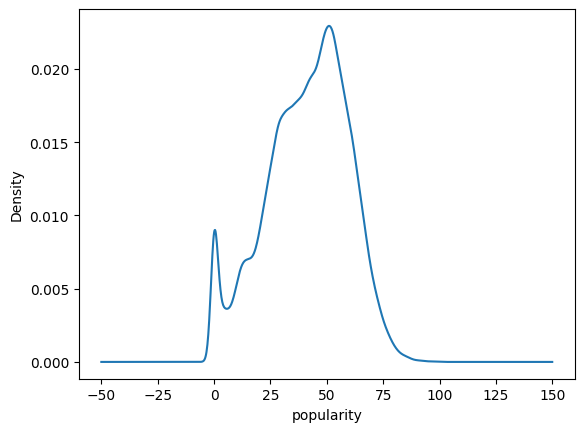


popularity is normally distributed

popularity has 0.01% outliers

% of missing values in the danceability:
0.0

descriptive stats for danceability:
count    232725.000000
mean          0.554364
std           0.185608
min           0.056900
25%           0.435000
50%           0.571000
75%           0.692000
max           0.989000
Name: danceability, dtype: float64

skewness of the danceability:
-0.37827814005632515

distribution of the danceability:


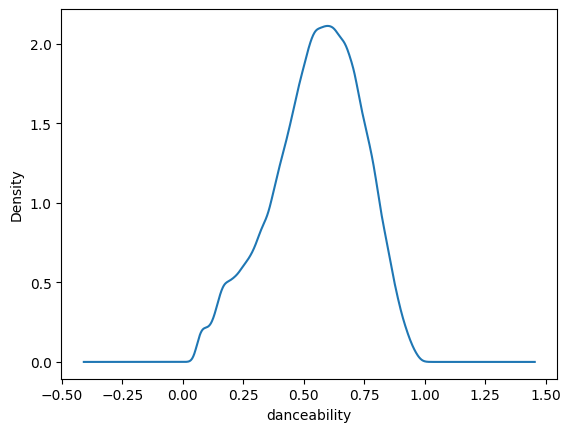


danceability is normally distributed

danceability has 0.00% outliers

% of missing values in the energy:
0.0

descriptive stats for energy:
count    232725.000000
mean          0.570958
std           0.263456
min           0.000020
25%           0.385000
50%           0.605000
75%           0.787000
max           0.999000
Name: energy, dtype: float64

skewness of the energy:
-0.40022327921151274

distribution of the energy:


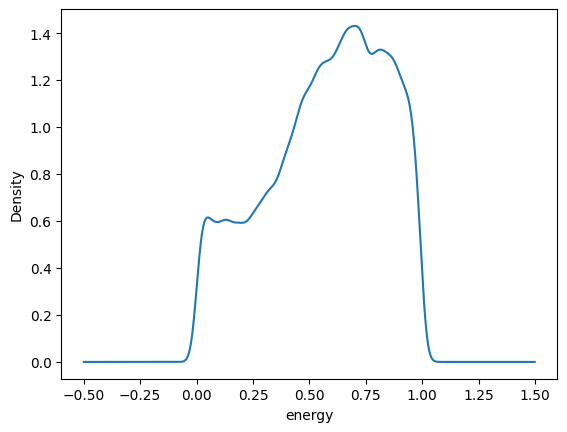


energy is normally distributed

energy has 0.00% outliers

% of missing values in the valence:
0.0

descriptive stats for valence:
count    232725.000000
mean          0.454917
std           0.260065
min           0.000000
25%           0.237000
50%           0.444000
75%           0.660000
max           1.000000
Name: valence, dtype: float64

skewness of the valence:
0.14413080121090951

distribution of the valence:


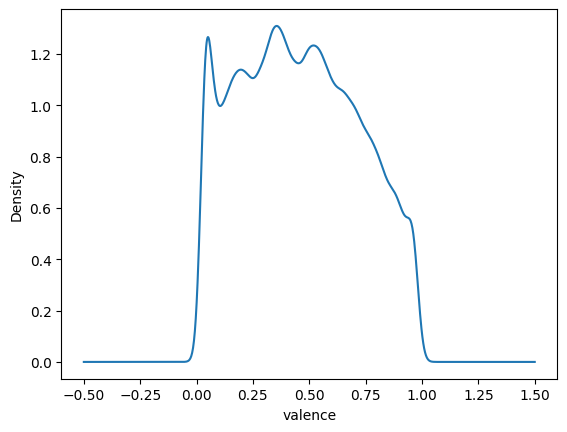


valence is normally distributed

valence has 0.00% outliers

% of missing values in the acousticness:
0.0

descriptive stats for acousticness:
count    232725.000000
mean          0.368560
std           0.354768
min           0.000000
25%           0.037600
50%           0.232000
75%           0.722000
max           0.996000
Name: acousticness, dtype: float64

skewness of the acousticness:
0.5342420873336345

distribution of the acousticness:


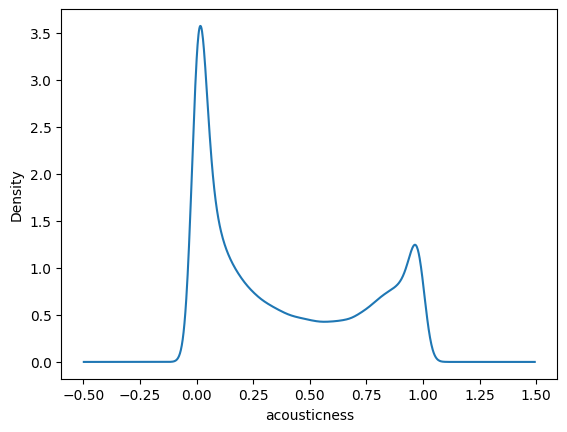


acousticness is normally distributed

acousticness has 0.00% outliers

% of missing values in the loudness:
0.0

descriptive stats for loudness:
count    232725.000000
mean         -9.569885
std           5.998204
min         -52.457000
25%         -11.771000
50%          -7.762000
75%          -5.501000
max           3.744000
Name: loudness, dtype: float64

skewness of the loudness:
-1.6622083819983902

distribution of the loudness:


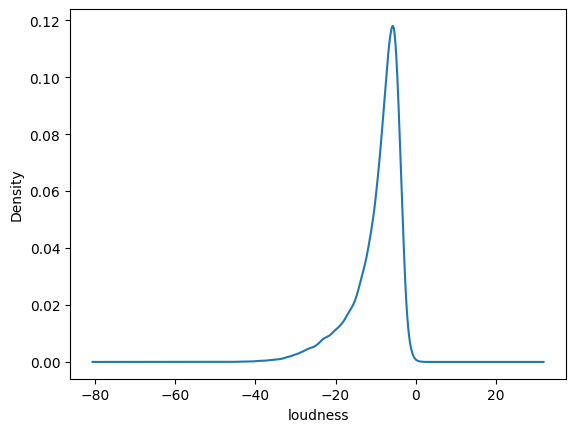


loudness is not normally distributed

loudness has 6.09% outliers

% of missing values in the tempo:
0.0

descriptive stats for tempo:
count    232725.000000
mean        117.666585
std          30.898907
min          30.379000
25%          92.959000
50%         115.778000
75%         139.054000
max         242.903000
Name: tempo, dtype: float64

skewness of the tempo:
0.4033497734190882

distribution of the tempo:


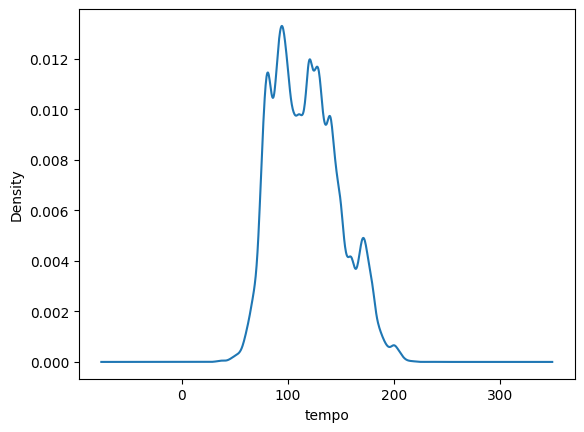


tempo is normally distributed

tempo has 0.05% outliers

% of missing values in the speechiness:
0.0

descriptive stats for speechiness:
count    232725.000000
mean          0.120765
std           0.185518
min           0.022200
25%           0.036700
50%           0.050100
75%           0.105000
max           0.967000
Name: speechiness, dtype: float64

skewness of the speechiness:
3.3112688320277095

distribution of the speechiness:


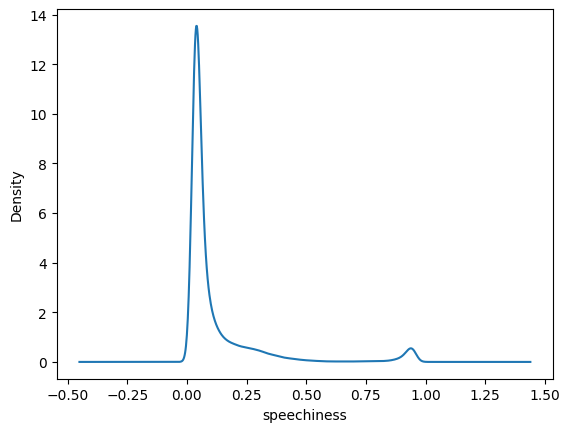


speechiness is not normally distributed

speechiness has 14.17% outliers

% of missing values in the instrumentalness:
0.0

descriptive stats for instrumentalness:
count    232725.000000
mean          0.148301
std           0.302768
min           0.000000
25%           0.000000
50%           0.000044
75%           0.035800
max           0.999000
Name: instrumentalness, dtype: float64

skewness of the instrumentalness:
1.8197663582499308

distribution of the instrumentalness:


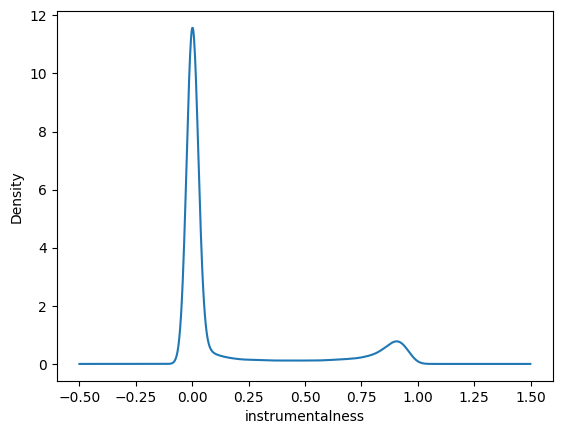


instrumentalness is not normally distributed

instrumentalness has 22.15% outliers

% of missing values in the liveness:
0.0

descriptive stats for liveness:
count    232725.000000
mean          0.215009
std           0.198273
min           0.009670
25%           0.097400
50%           0.128000
75%           0.264000
max           1.000000
Name: liveness, dtype: float64

skewness of the liveness:
2.0740930302880183

distribution of the liveness:


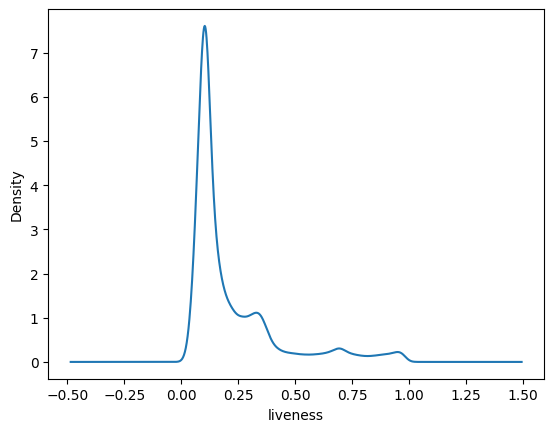


liveness is not normally distributed

liveness has 9.13% outliers

% of missing values in the duration_min:
0.0

descriptive stats for duration_min:
count    232725.000000
mean          3.918706
std           1.982265
min           0.256450
25%           3.047617
50%           3.673783
75%           4.429467
max          92.548617
Name: duration_min, dtype: float64

skewness of the duration_min:
9.893375646616404

distribution of the duration_min:


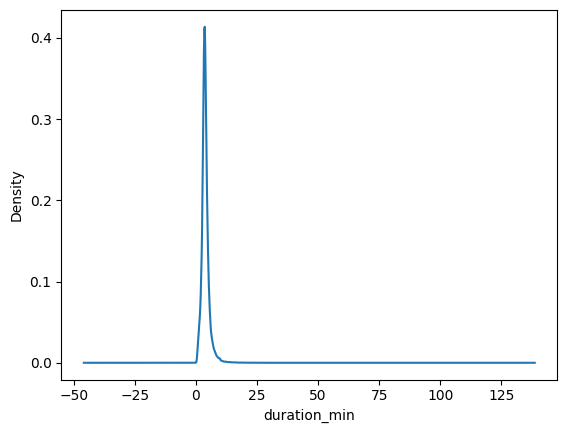


duration_min is not normally distributed

duration_min has 6.30% outliers


In [ ]:
num_col = [
    'popularity',
    'danceability',
    'energy',
    'valence',
    'acousticness',
    'loudness',
    'tempo',
    'speechiness',
    'instrumentalness',
    'liveness',
    'duration_min'
]

for col in num_col:
  print(f'\n% of missing values in the {col}:')
  print(df[col].isnull().mean()*100)
  print(f'\ndescriptive stats for {col}:')
  print(df[col].describe())
  print(f'\nskewness of the {col}:')
  print(df[col].skew())
  print(f'\ndistribution of the {col}:')
  df[col].plot(kind='kde')
  plt.xlabel(col)
  plt.show()
  if df[col].skew()<=1 and df[col].skew()>=-1:
    print(f'\n{col} is normally distributed')
    #Z-SCORE METHOD
    min = df[col].mean() - 3*df[col].std()
    max = df[col].mean() + 3*df[col].std()
    df_outlier = df[(df[col] < min) | (df[col] > max)]
    percent_of_outliers = df_outlier.shape[0]*100/df.shape[0]
    print(f'\n{col} has {percent_of_outliers:.2f}% outliers')
  else:
    print(f'\n{col} is not normally distributed')
    #IQR METHOD
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR
    df_outlier = df[(df[col] < min) | (df[col] > max)]
    percent_of_outliers = df_outlier.shape[0]*100/df.shape[0]
    print(f'\n{col} has {percent_of_outliers:.2f}% outliers')



#Univariate Analysis (Categorical)


Number of missing values in genre:
0

Number of unique categories in genre:
27

Frequency Distribution of top 10 in genre (including 'Other'):
genre
Other               0.594831
Comedy              0.041598
Soundtrack          0.041448
Indie               0.041005
Jazz                0.040567
Pop                 0.040331
Electronic          0.040292
Children’s Music    0.040189
Folk                0.039957
Hip-Hop             0.039940
Rock                0.039841
Name: proportion, dtype: float64


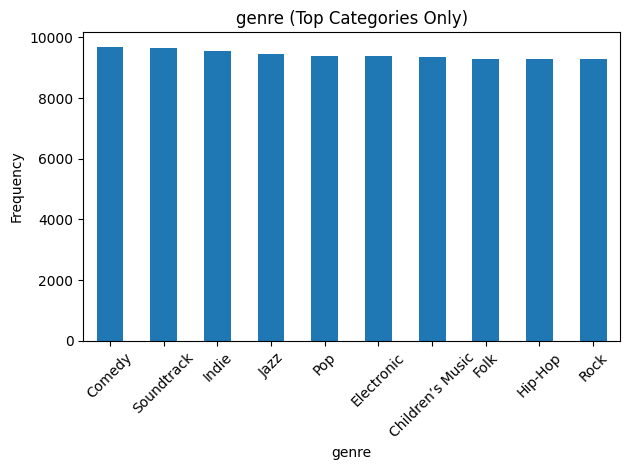


Number of missing values in mode:
0

Number of unique categories in mode:
2

Frequency Distribution of mode:
mode
1    0.652031
0    0.347969
Name: proportion, dtype: float64


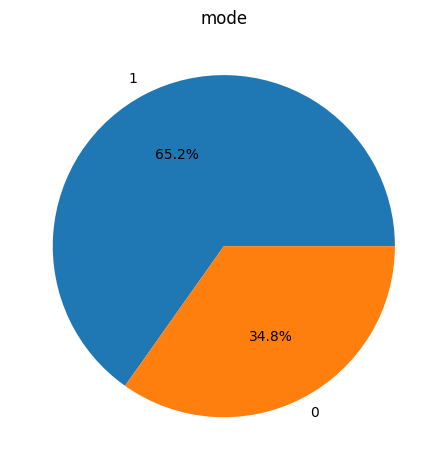


Number of missing values in key:
0

Number of unique categories in key:
12

Frequency Distribution of top 10 in key (including 'Other'):
key
C        0.118522
G        0.113396
D        0.103457
C#       0.099693
Other    0.097647
A        0.097415
F        0.087137
B        0.075888
E        0.074723
A#       0.066714
F#       0.065408
Name: proportion, dtype: float64


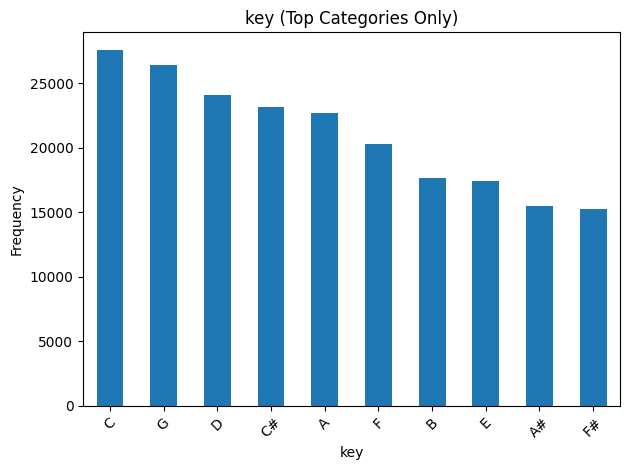


Number of missing values in time_signature:
0

Number of unique categories in time_signature:
5

Frequency Distribution of time_signature:
time_signature
4/4    0.862649
3/4    0.103603
5/4    0.022507
1/4    0.011206
0/4    0.000034
Name: proportion, dtype: float64


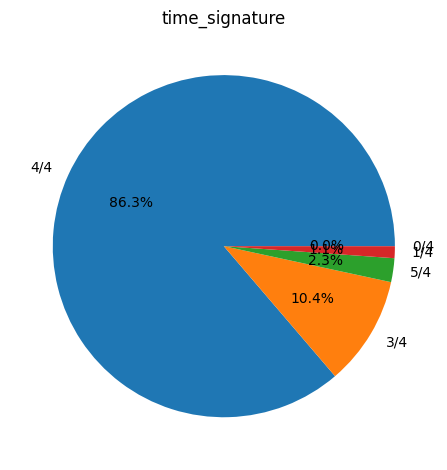


Number of missing values in popularity_group:
0

Number of unique categories in popularity_group:
3

Frequency Distribution of popularity_group:
popularity_group
Medium    0.600650
Low       0.255652
High      0.143698
Name: proportion, dtype: float64


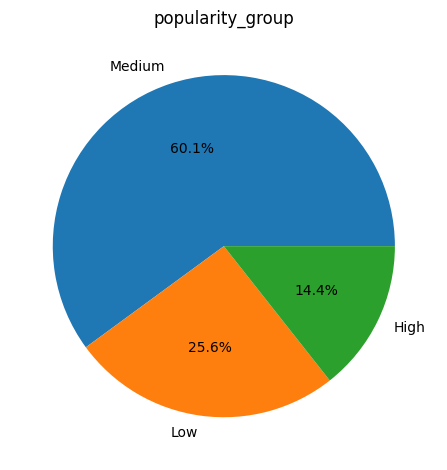

In [ ]:
cat_cols = [
    'genre',
    'mode',
    'key',
    'time_signature',
    'popularity_group'
]

for col in cat_cols:
   print(f"\nNumber of missing values in {col}:")
   print(df[df[col]=='missing'][col].count())
   print(f"\nNumber of unique categories in {col}:")
   num_unique = df[col].nunique()
   print(num_unique)


   if num_unique > 10:
        print(f"\nFrequency Distribution of top 10 in {col} (including 'Other'):")

        top10 = df[col].value_counts(normalize=True).nlargest(10)

        temp_col = df[col].apply(lambda x: x if x in top10 else 'Other')

        freq = temp_col.value_counts(normalize=True)
        print(freq)

        plot_data = temp_col[temp_col != 'Other'].value_counts()
        plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        #plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()

   else:
        print(f"\nFrequency Distribution of {col}:")
        print(df[col].value_counts(normalize=True))
        df[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
        plt.ylabel("")
        plt.tight_layout()
        plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()



#Bivariate Analysis (numeric-numeric)

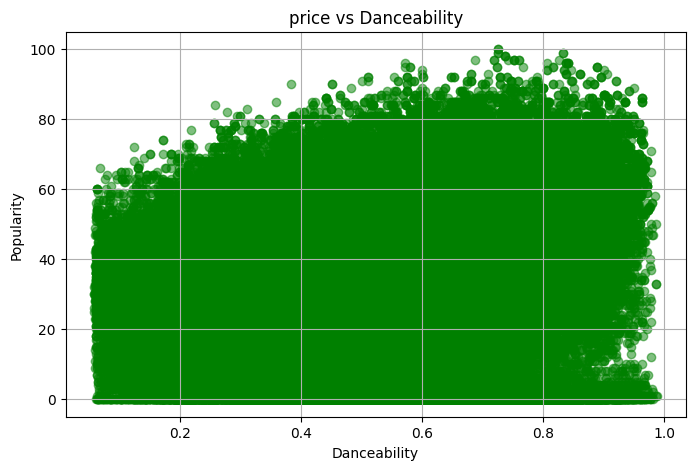

Correlation between danceability and popularity: 0.26


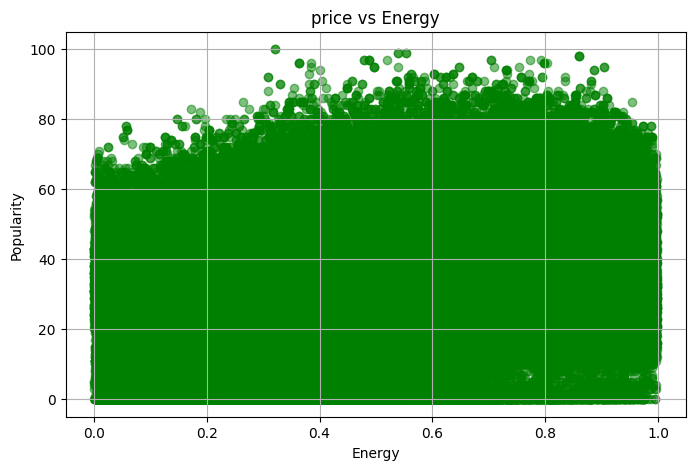

Correlation between energy and popularity: 0.25


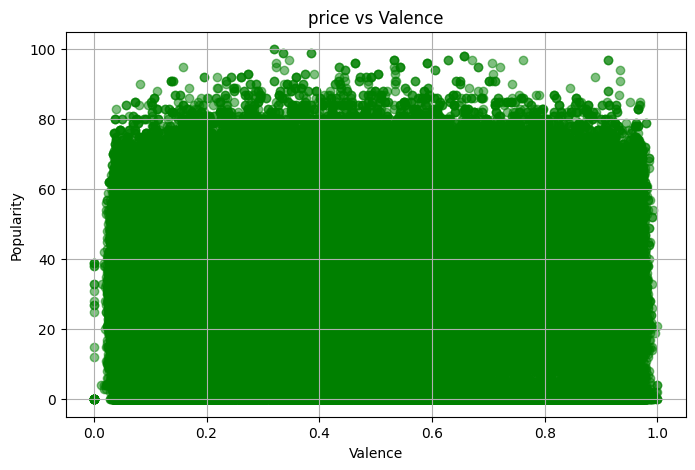

Correlation between valence and popularity: 0.06


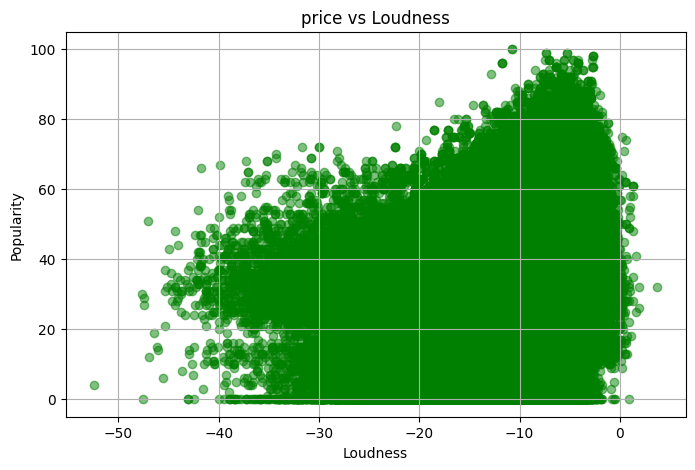

Correlation between loudness and popularity: 0.36


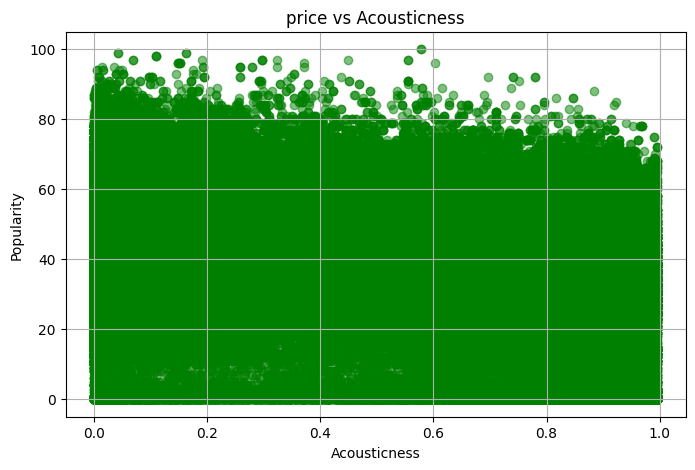

Correlation between acousticness and popularity: -0.38


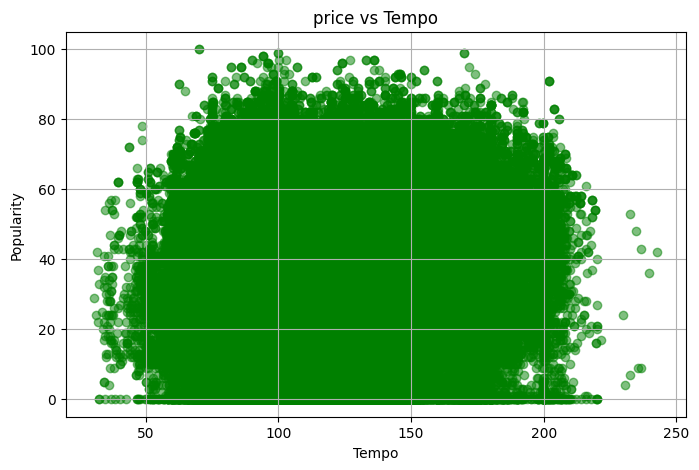

Correlation between tempo and popularity: 0.08


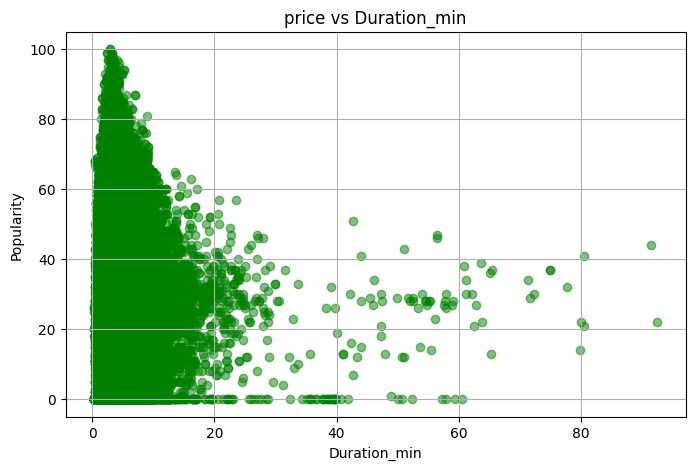

Correlation between duration_min and popularity: 0.00


In [ ]:
#target column is popularity
target = 'popularity'

num_cols = [
    'danceability',
    'energy',
    'valence',
    'loudness',
    'acousticness',
    'tempo',
    'duration_min'
]

for col in num_cols:
  plt.figure(figsize=(8, 5))
  plt.scatter(df[col], df[target], alpha=0.5, color='green')
  plt.title(f'price vs {col.capitalize()}')
  plt.xlabel(col.capitalize())
  plt.ylabel(target.capitalize())
  plt.grid(True)
  #plt.savefig(f"{col}_vs_Price_NUM_NUM.png", dpi=300, bbox_inches="tight")  # save as PNG
  plt.show()
  corr = df[[col, target]].corr().iloc[0,1]
  print(f"Correlation between {col} and {target}: {corr:.2f}")


#Bivariate Analysis (Numeric-Categorical)


Statistical Summary for genre vs popularity 
                  count   mean  median  min  max   std
genre                                                 
Pop                9386  66.59    66.0    3  100  7.25
Rock               9272  59.62    59.0    0   95  7.47
Hip-Hop            9295  58.42    57.0   14   98  8.27
Indie              9543  54.70    54.0    0   97  7.36
Children’s Music   9353  54.66    54.0    0   86  7.85
Folk               9299  49.94    49.0    0   84  8.22
Jazz               9441  40.82    40.0    0   79  9.59
Electronic         9377  38.06    37.0    0   96  9.74
Soundtrack         9646  33.95    33.0    0   72  8.64
Comedy             9681  21.34    20.0    0   61  8.43


/tmp/ipython-input-282382879.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


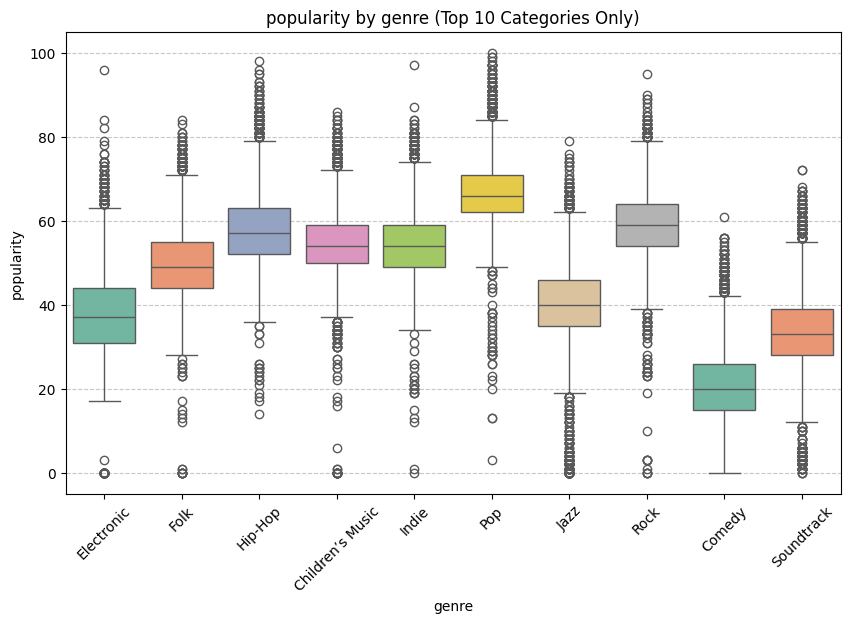


Statistical Summary for mode vs popularity 
       count   mean  median  min  max    std
mode                                        
0      80981  42.88    44.0    0  100  17.22
1     151744  40.19    42.0    0   97  18.62


/tmp/ipython-input-282382879.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


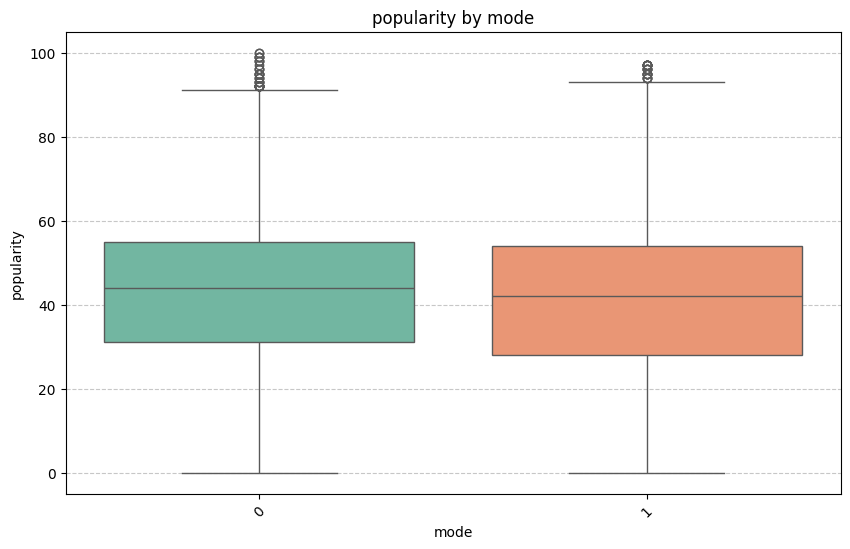

/tmp/ipython-input-282382879.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df.groupby(col)[target]
/tmp/ipython-input-282382879.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')



Statistical Summary for key vs popularity 
     count   mean  median  min    max    std
key                                         
C#   23201  43.70    46.0  0.0  100.0  17.97
B    17661  43.48    46.0  0.0   99.0  17.16
F#   15222  43.10    45.0  0.0   97.0  17.72
E    17390  40.72    42.0  0.0   95.0  17.75
A    22671  40.50    42.0  0.0   91.0  17.64
A#   15526  40.43    42.0  0.0   93.0  18.81
C    27583  40.39    42.0  0.0   94.0  18.40
F    20279  39.98    41.0  0.0   99.0  18.75
D    24077  39.97    41.0  0.0   97.0  18.25
G    26390  39.92    41.0  0.0   96.0  18.08
D#       0    NaN     NaN  NaN    NaN    NaN
G#       0    NaN     NaN  NaN    NaN    NaN


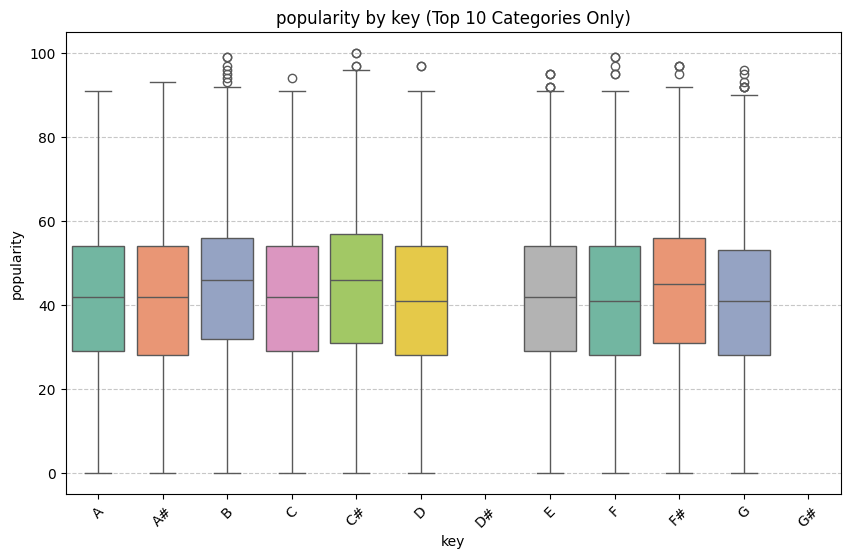


Statistical Summary for time_signature vs popularity 
                 count   mean  median  min  max    std
time_signature                                        
4/4             200760  42.63    45.0    0  100  17.76
0/4                  8  37.75    41.0   12   61  22.32
5/4               5238  32.64    31.0    0   84  18.57
3/4              24111  31.86    32.0    0   90  17.97
1/4               2608  28.39    28.0    0   77  17.32


/tmp/ipython-input-282382879.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


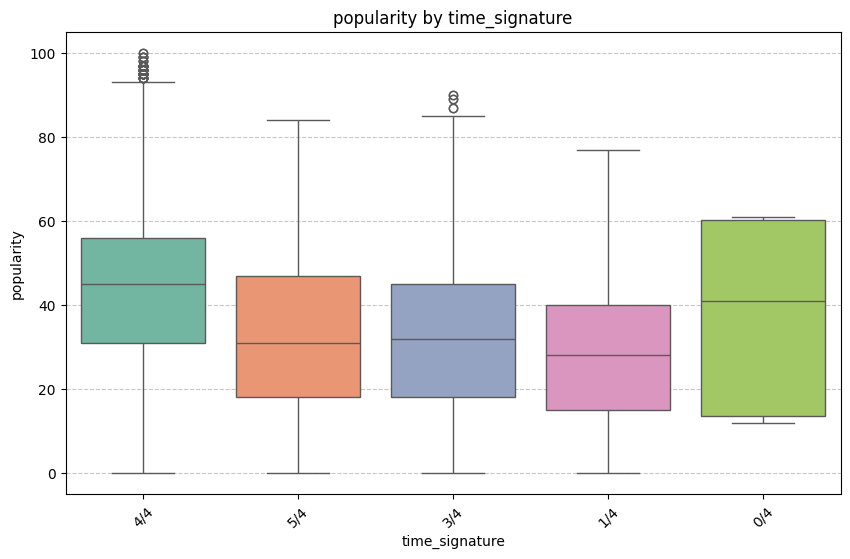

/tmp/ipython-input-282382879.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df.groupby(col)[target]



Statistical Summary for popularity_group vs popularity 
                   count   mean  median  min  max   std
popularity_group                                       
High               32535  67.20    66.0   61  100  5.65
Medium            135995  45.92    46.0   31   60  8.38
Low                57883  19.70    22.0    1   30  8.22


/tmp/ipython-input-282382879.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')


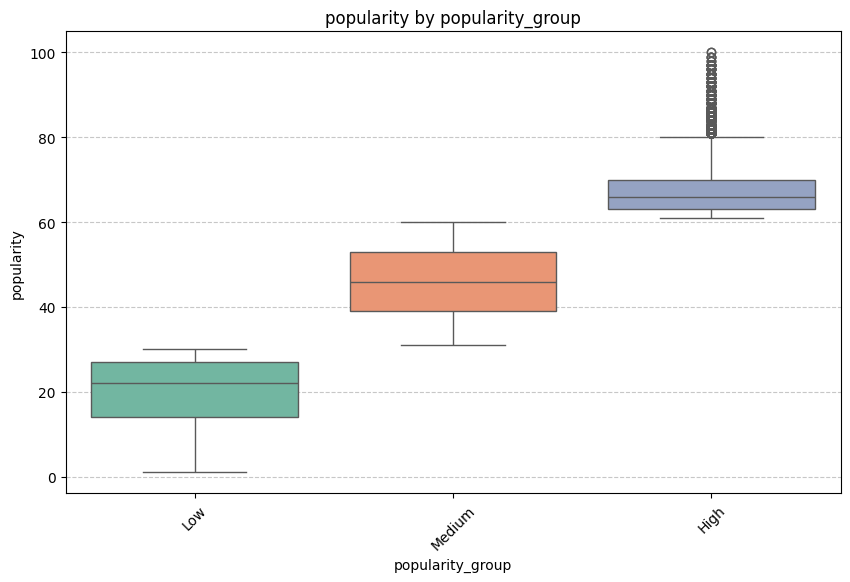

In [ ]:
#target column is popularity

target = 'popularity'
cat_cols = [
    'genre',
    'mode',
    'key',
    'time_signature',
    'popularity_group'
]
for col in cat_cols:
    if df[col].nunique() > 10:
        top10_categories = df[col].value_counts().nlargest(10).index.tolist()
        plot_df = df[df[col].isin(top10_categories)].copy()
        summary = (
        plot_df.groupby(col)[target]
        .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        .sort_values(by=['mean','count'], ascending=[False,False])
        .round(2)
        )
        print(f"\nStatistical Summary for {col} vs {target} ")
        print(summary)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')
        plt.title(f'{target} by {col} (Top 10 Categories Only)')
    else:
        plot_df = df.copy()
        summary = (
        plot_df.groupby(col)[target]
        .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        .sort_values(by=['mean','count'], ascending=[False,False])
        .round(2)
        )
        print(f"\nStatistical Summary for {col} vs {target} ")
        print(summary)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target, data=plot_df, palette='Set2')
        plt.title(f'{target} by {col}')

    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    #plt.savefig(f"{col}_vs_profit_CAT_NUM.png", dpi=300, bbox_inches="tight")  # save as PNG
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   genre             232725 non-null  object  
 1   artist_name       232725 non-null  object  
 2   track_name        232724 non-null  object  
 3   track_id          232725 non-null  object  
 4   popularity        232725 non-null  int64   
 5   acousticness      232725 non-null  float64 
 6   danceability      232725 non-null  float64 
 7   duration_ms       232725 non-null  int64   
 8   energy            232725 non-null  float64 
 9   instrumentalness  232725 non-null  float64 
 10  key               232725 non-null  category
 11  liveness          232725 non-null  float64 
 12  loudness          232725 non-null  float64 
 13  mode              232725 non-null  int64   
 14  speechiness       232725 non-null  float64 
 15  tempo             232725 non-null  float64 
 16  ti

#Clustering

In [ ]:
cluster_features = [
    'danceability',
    'energy',
    'valence',
    'loudness',
    'tempo',
    'acousticness'
]


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[cluster_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


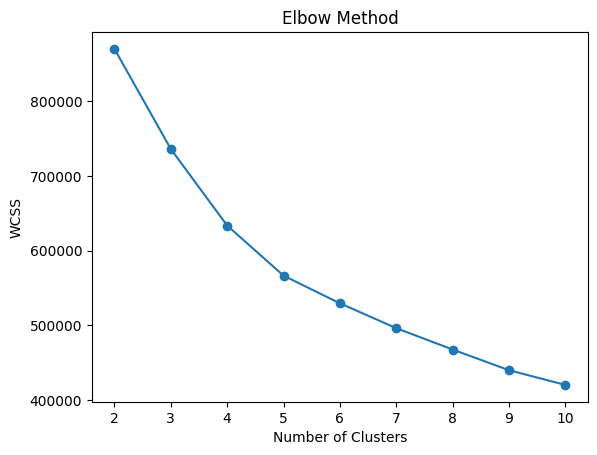

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_profile = df.groupby('cluster')[cluster_features].mean()
cluster_profile


,danceability,energy,valence,loudness,tempo,acousticness
cluster,,,,,,
0,0.560176,0.432713,0.388053,-11.064873,108.939005,0.644345
1,0.699200,0.698135,0.652806,-6.732294,108.858446,0.166367
2,0.282982,0.139481,0.146689,-20.857847,101.270151,0.889630
3,0.500869,0.756390,0.419057,-6.053159,145.616660,0.106628


In [ ]:
cluster_labels = {
    0: 'Acoustic / Chill Songs',
    1: 'High Energy Dance / Pop Tracks',
    2: 'Low Energy / Moody Tracks',
    3: 'Fast-Paced Party Tracks'
}

df['cluster_name'] = df['cluster'].map(cluster_labels)


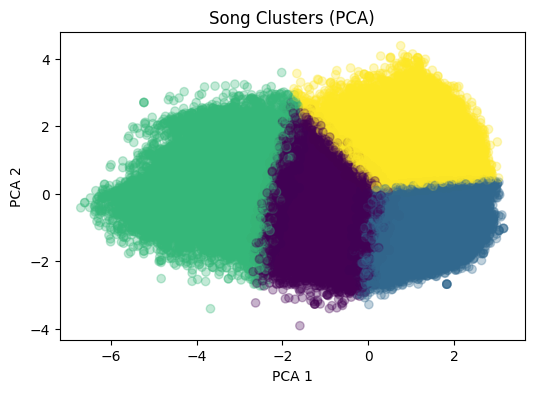

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(6,4))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], alpha=0.3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Song Clusters (PCA)')
plt.show()


In [ ]:
df[['cluster', 'cluster_name']].head()


,cluster,cluster_name
0,3,Fast-Paced Party Tracks
1,3,Fast-Paced Party Tracks
2,0,Acoustic / Chill Songs
3,0,Acoustic / Chill Songs
4,2,Low Energy / Moody Tracks


In [ ]:
df.to_excel('spotify_clustered_data.xlsx', index=False)
